In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [69]:
dataset=pd.read_excel("blood.xlsx")

In [70]:
dataset.head()

,Index,Age,Systolic Blood Pressure
0,1,39,144
1,2,47,220
2,3,45,138
3,4,47,145
4,5,65,162


In [71]:
dataset.columns

Index(['Index', 'Age', 'Systolic Blood Pressure'], dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D3FDF3710>,
      dtype=object)

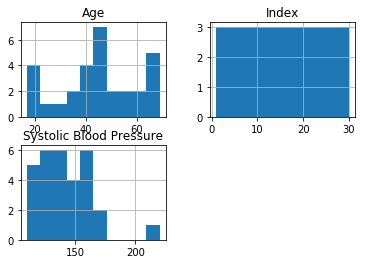

In [72]:
dataset.hist()

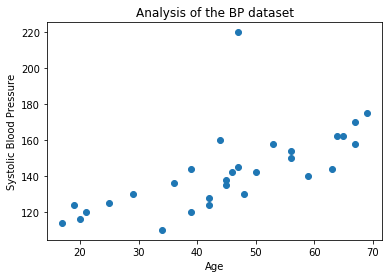

In [73]:
plt.scatter(dataset['Age'],dataset['Systolic Blood Pressure'])
plt.xlabel("Age")
plt.ylabel('Systolic Blood Pressure')
plt.title('Analysis of the BP dataset')
plt.show()

SLR attempts to find out a line or a hyperplane 
that can explain the trend present in the dataset.

The line that best fits the data or explains the trend
accurately is also known as the line of predictions.

Once the line of prediction is found. All the 
predictions of the model come from the equation
of the line.

lop = mx + c

where m is slope or gradient
and c is the intercept or bias
x is an independent variable

Since, this is a small dataset, it doesnt require
preprocessing coz it is already free from missing
values or string values.


In [74]:
X = dataset.iloc[:, 1].values
y = dataset.iloc[:, -1].values
X = X.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
lin_reg.predict([[22]])

lin_reg.predict([[100]])

array([195.80175328])

In [76]:
lin_reg.predict([[24]])

array([122.01560657])

In [77]:
lin_reg.predict([[100]])

array([195.80175328])

In [78]:
m = lin_reg.coef_

In [79]:
m

array([0.97087035])

In [80]:
c = lin_reg.intercept_
c


98.7147181382184

We can seen from the above code that the 'm' of the 
line of prediction is 0.97 and 'c' is 98.71

Lets see how are the predictions getting generated

y = m * x + c

In our context,

blood_pressure = m * age + c

putting the value of 'm' and 'c' in the eqn we get,




blood_pressure = 0.97 * 22 + 98.71
blood_pressure

In [81]:
blood_pressure = 0.97 * 22 + 98.71
blood_pressure

120.05

In [82]:
lin_reg.predict([[22]])

array([120.07386587])

In [83]:
blood_pressure = 0.97 * 24 + 98.71
blood_pressure

121.99

In [84]:
lin_reg.predict([[24]])

array([122.01560657])

Now lets actually plot the line of predictions
with the dataset to check whether it can explain
the trend present in the dataset accurately


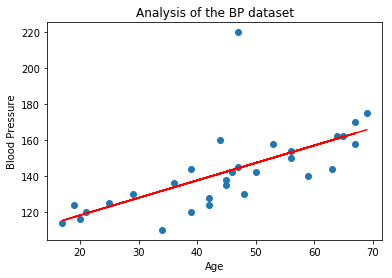

In [85]:
plt.scatter(X, y)
plt.plot(X, lin_reg.predict(X), c = "r")
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Analysis of the BP dataset')
plt.show()

Lets check the accuracy of the model that we just
created

In [86]:
lin_reg.score(X, y)

0.43239473192759537

It came out to be only 43%. This is not a good enough
model.

There could be various reasons why the model 
did not perform well. One of the most common resons
is the presence of outliers.

We are lucky that this dataset is very small and
simple and only 2 dimensional. Which is why one can
spot the outlier by just looking at the plot.


In [87]:
X = dataset.iloc[2:, 1].values
y = dataset.iloc[2:, -1].values
X = X.reshape(-1, 1)


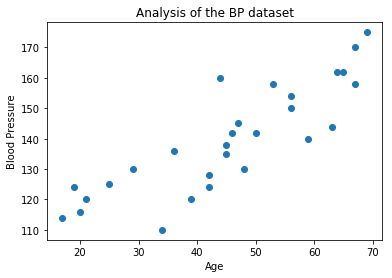

In [88]:
plt.scatter(X, y)
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title('Analysis of the BP dataset')
plt.show()


In [89]:
from sklearn.linear_model import LinearRegression
lin_reg_im = LinearRegression()
lin_reg_im.fit(X, y)

lin_reg_im.score(X, y)


0.7235045002180637

We have now proved that removing the oulier does
increase the accuracy of the model. In this case
it increased from 43% to 72%


In [90]:
y_pred_im = lin_reg_im.predict(X)

In [91]:
lin_reg_im.coef_

array([0.9585523])

In [92]:
lin_reg_im.intercept_

96.30556026445159

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



from sklearn.impute import SimpleImputer
sim = SimpleImputer(strategy = 'median')
X[:, [4]] = sim.fit_transform(X[:, [4]])

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
X[:, 8] = lab.fit_transform(X[:, 8])

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.score(X, y)

lin_reg.intercept_
lin_reg.coef_
len(lin_reg.coef_)


IndexError: index 4 is out of bounds for axis 1 with size 1

In [ ]:
dataset = pd.read_csv('housing.csv')
dataset.isnull().sum()


In [ ]:
dataset.head()

In [ ]:
X = dataset.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 9]].values
y = dataset.iloc[:, 8].values





In [ ]:
from sklearn.impute import SimpleImputer
sim = SimpleImputer(strategy = 'median')
X[:, [4]] = sim.fit_transform(X[:, [4]])


In [ ]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
X[:, 8] = lab.fit_transform(X[:, 8])

In [ ]:
X[0:5,8]

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)


In [ ]:
lin_reg.score(X, y)

In [ ]:
lin_reg.intercept_

In [ ]:
lin_reg.coef_

In [ ]:
len(lin_reg.coef_)

There is hidden gem in this dataset. Lets see
if you can spot it. :
    
The hidden insight is that the dataset is 
already scaled. The Data Scientist inside my
mind tell me, that since this dataset is already
scaled, you should not have done scaling. 

Bcoz it will yield no useful results.
Earlier, we first scaled the dataset and then 
applied Regression, the accuracy came out to
be around 63.5%

Lets see whether the accuracy increase, or 
decreses or remains almost constant if we dont
scale the dataset ourselves

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset2 = pd.read_csv('housing.csv')
dataset2.isnull().sum()

X = dataset2.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 9]].values
y = dataset2.iloc[:, 8].values

from sklearn.impute import SimpleImputer
sim = SimpleImputer(strategy = 'median')
X[:, [4]] = sim.fit_transform(X[:, [4]])

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
X[:, 8] = lab.fit_transform(X[:, 8])

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

In [ ]:
lin_reg.score(X, y)

In [ ]:
lin_reg.intercept_

In [ ]:
lin_reg.coef_

In [ ]:
len(lin_reg.coef_)

In [ ]:
dataset["Age"].value_counts()